# matplotlib
*Plot everything*

## Example 1: Plot for yourself

Plot something.

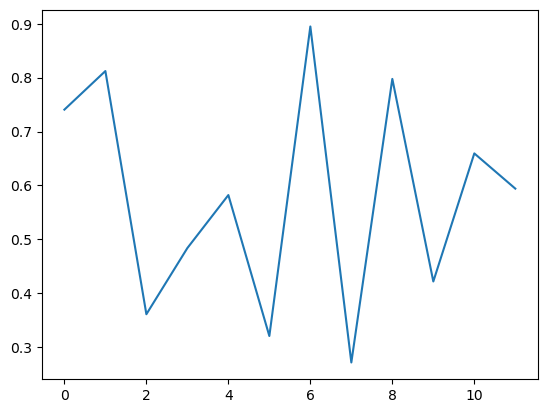

In [8]:
import numpy as np
from matplotlib import pyplot as plt

plt.plot(np.random.rand(12))

## Example 2: Plot for publication

### Goal

Have a nice self contained plot, with labels, legends and multiple panels.

### Strategy
1. Create the *figure* and the *axes*.

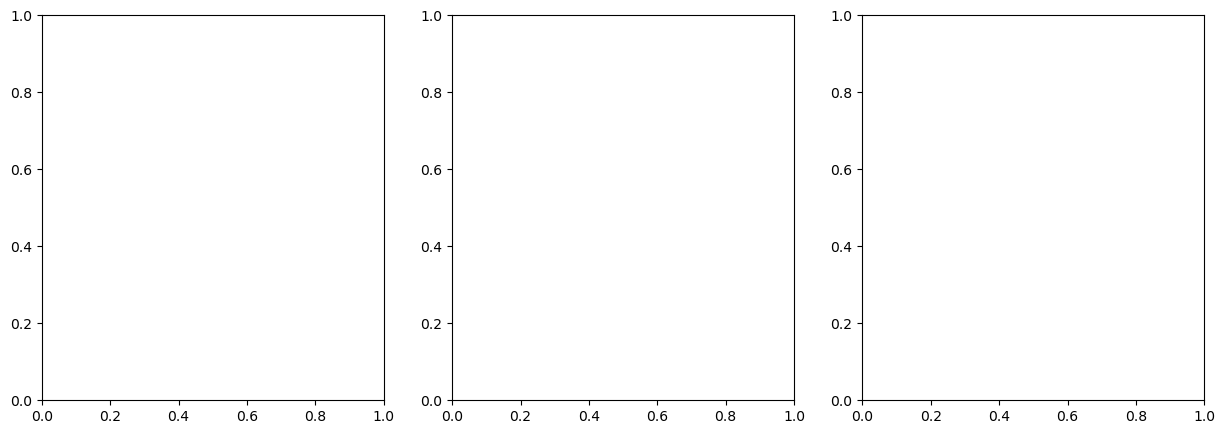

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5), facecolor = "white")

2. Add elements to the *axes* using the object approach.

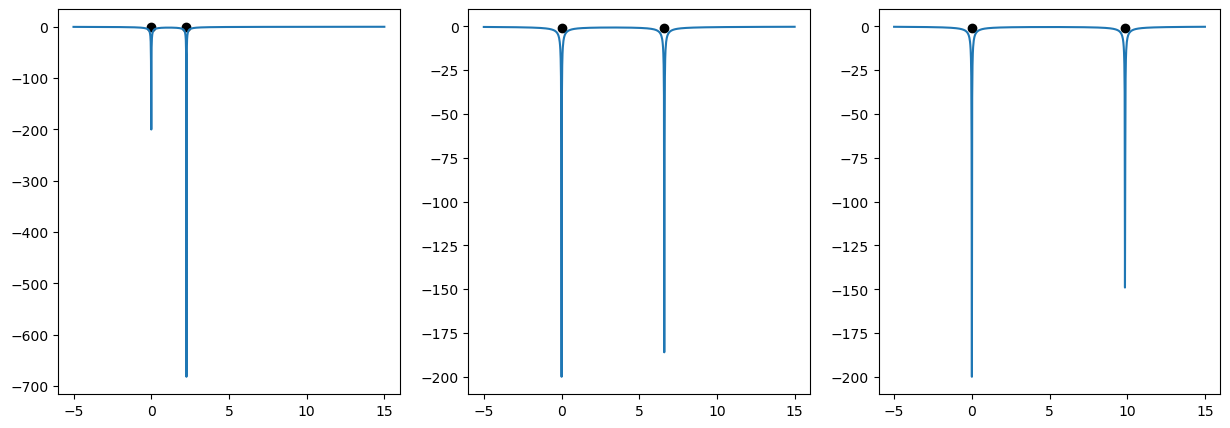

In [10]:
def potential(x, x0):
    return -1 / np.abs(x) - 1 / np.abs(x - x0)

x0s = [2.2658, 6.616992901, 9.861570409]
xx = np.linspace(-5, 15, 1000)

for (ax, x0) in zip(axes, x0s):
    ax.plot(xx, potential(xx, x0), label = "Potential")
    ax.scatter(0, -1, color = "black", label = "Atom")
    ax.scatter(x0, -1, color = "black")

fig

3. Fix the axes, add labels and a legend.

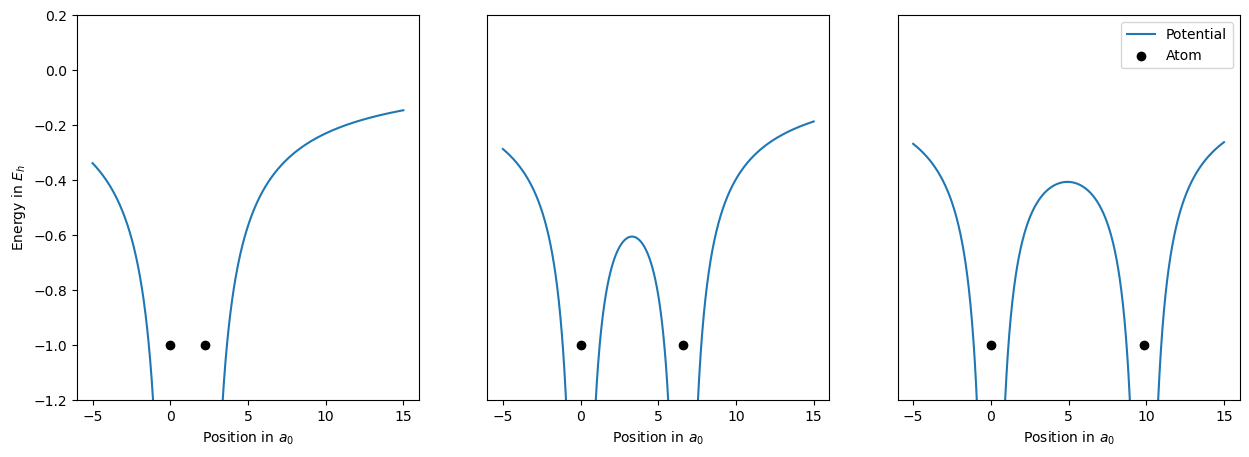

In [11]:
for ax in axes:
    ax.update({
        "ylim": (-1.2, 0.2),
        "xlabel": "Position in $a_0$"
    })

axes[0].update({
    "ylabel": "Energy in $E_h$"
})

axes[-1].legend()

for ax in axes[1:]:
    ax.set_yticks([])

fig

4. Save the figure.

In [12]:
fig.savefig("myfig.pdf")

## Example 3: The full example for reference

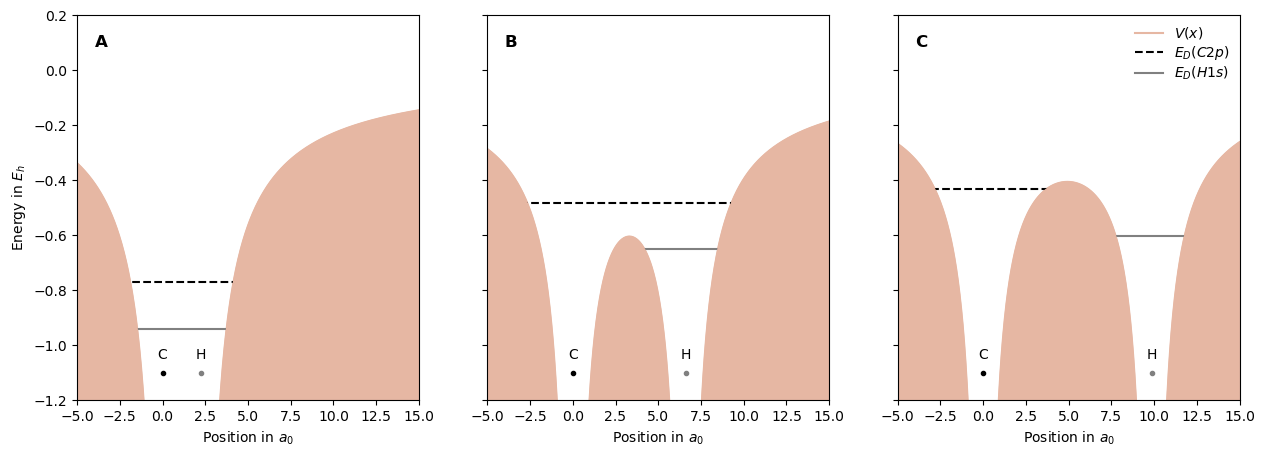

In [13]:
import numpy as np
from matplotlib import pyplot as plt


def potential(x, x0):
    return -1 / np.abs(x) - 1 / np.abs(x - x0)


fig, axes = plt.subplots(
    1, 3,
    sharey=True,
    figsize=(15, 5),
    facecolor = "white")

x0s = [2.2658, 6.616992901, 9.861570409]
Clevels = [
    (-0.77155, -5, 5),
    (-0.48133, -5, 10),
    (-0.4316, -5, 5)]
Hlevels = [
    (-0.94135, -5, 5),
    (-0.65113, 3, 10),
    (-0.6014, 5, 15)]

labels = ["A", "B", "C"]

xx = np.linspace(-5, 15, 1000)

for (ax, x0, Clevel, Hlevel, label) in zip(axes, x0s, Clevels, Hlevels, labels):
    ax.text(
        0.07, 0.93, label,
        transform=ax.transAxes,
        va="center", ha="center",
        fontsize=12,
        fontweight="bold")

    ax.fill_between(
        xx, -100, potential(xx, x0),
        color="#e6b7a3")

    ax.plot(
        xx, potential(xx, x0),
        zorder=-200,
        color="#e6b7a3",
        label="$V(x)$")

    ax.plot(
        Clevel[1:3],
        [Clevel[0], Clevel[0]],
        color="black",
        linestyle="dashed",
        zorder=-100,
        label="$E_D(C 2p)$")
    
    ax.plot(
        [0], [-1.1],
        marker=".",
        color="black"
    )
    ax.annotate("C", (0, -1.05), ha="center")

    ax.plot(
        Hlevel[1:3],
        [Hlevel[0], Hlevel[0]],
        color="gray",
        zorder=-100,
        label="$E_D(H 1s)$")
    ax.plot(
        [x0], [-1.1],
        marker=".",
        color="gray"
    )

    ax.annotate("H", (x0, -1.05), ha="center")

    ax.update({
        "xlim": (-5, 15),
        "ylim": (-1.2, 0.2),
        "xlabel": "Position in $a_0$"
    })

axes[0].update({
    "ylabel": "Energy in $E_h$"
})
axes[2].legend(
    loc="upper right",
    frameon=False,
    labelspacing=0.2,
    borderpad=0.2)
